использованием рекуррентных нейронных сетей

In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_excel('Train.xlsx', sheet_name='Monthly')

In [3]:
df=df.drop(labels = [0],axis = 0)

In [4]:
df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'], format="%Ym%m")

In [5]:
df.head(5)

Unnamed: 0  \
1 2003-01-01   
2 2003-02-01   
3 2003-03-01   
4 2003-04-01   
5 2003-05-01   

   Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения   \
1                                               74.0                     
2                                               78.0                     
3                                               84.0                     
4                                               83.0                     
5                                               79.0                     

   Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения   \
1                                               93.0                    
2                                               95.0                    
3                                               98.0                    
4                                               95.0                    
5                                               94.0                    

   Диффузный индекс заработной платы, ожидаемые изменения   \
1                                               61.0         
2                                               66.0         
3                                               72.0         
4                                               70.0         
5                                               76.0         

   Диффузный индекс занятости, ожидаемые изменения   \
1                                              40.0   
2                                              37.0   
3                                              45.0   
4                                              40.0   
5                                              43.0   

   Диффузный индекс выпуска, ожидаемые изменения   \
1                                            44.0   
2                                            49.0   
3                                            56.0   
4                                            66.0   
5                                            66.0   

   Диффузный индекс закупок оборудования, ожидаемые изменения   \
1                                               28.0             
2                                               30.0             
3                                               29.0             
4                                               38.0             
5                                               33.0             

   Диффузный индекс финансового состояния, ожидаемые изменения   \
1                                               47.0              
2                                               53.0              
3                                               51.0              
4                                               59.0              
5                                               63.0              

   Диффузный индекс портфеля заказов, ожидаемые изменения   \
1                                               44.0         
2                                               56.0         
3                                               61.0         
4                                               69.0         
5                                               68.0         

   Диффузный индекс задолженности банкам, ожидаемые изменения   ...  \
1                                               22.0            ...   
2                                               18.0            ...   
3                                               25.0            ...   
4                                               23.0            ...   
5                                               23.0            ...   

  Среднемесячная пенсия, руб. Реальная пенсия  MIACR  \
1                    7.288791               0  6.331   
2                    7.313953         0.00896  2.514   
3                    7.314153       -0.001091  2.625   
4                    7.382809        0.057178  1.888   
5                    7.382809        0.049146  1.308   

  Ставка по краткосрочным кредитам, население  \
1           

In [6]:
df['Unnamed: 0'].min(), df['Unnamed: 0'].max()

(Timestamp('2003-01-01 00:00:00'), Timestamp('2015-12-01 00:00:00'))

In [7]:
df.rename(columns = {'Unnamed: 0' : 'time'}, inplace = True) 

In [8]:
df['time'].nunique()

156

In [9]:
df.to_csv('data.csv', sep=',')

Набор данных

In [10]:
#df = pd.read_csv('data.csv', index_col=0)

In [11]:
df.head(5)

time  \
1 2003-01-01   
2 2003-02-01   
3 2003-03-01   
4 2003-04-01   
5 2003-05-01   

   Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения   \
1                                               74.0                     
2                                               78.0                     
3                                               84.0                     
4                                               83.0                     
5                                               79.0                     

   Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения   \
1                                               93.0                    
2                                               95.0                    
3                                               98.0                    
4                                               95.0                    
5                                               94.0                    

   Диффузный индекс заработной платы, ожидаемые изменения   \
1                                               61.0         
2                                               66.0         
3                                               72.0         
4                                               70.0         
5                                               76.0         

   Диффузный индекс занятости, ожидаемые изменения   \
1                                              40.0   
2                                              37.0   
3                                              45.0   
4                                              40.0   
5                                              43.0   

   Диффузный индекс выпуска, ожидаемые изменения   \
1                                            44.0   
2                                            49.0   
3                                            56.0   
4                                            66.0   
5                                            66.0   

   Диффузный индекс закупок оборудования, ожидаемые изменения   \
1                                               28.0             
2                                               30.0             
3                                               29.0             
4                                               38.0             
5                                               33.0             

   Диффузный индекс финансового состояния, ожидаемые изменения   \
1                                               47.0              
2                                               53.0              
3                                               51.0              
4                                               59.0              
5                                               63.0              

   Диффузный индекс портфеля заказов, ожидаемые изменения   \
1                                               44.0         
2                                               56.0         
3                                               61.0         
4                                               69.0         
5                                               68.0         

   Диффузный индекс задолженности банкам, ожидаемые изменения   ...  \
1                                               22.0            ...   
2                                               18.0            ...   
3                                               25.0            ...   
4                                               23.0            ...   
5                                               23.0            ...   

  Среднемесячная пенсия, руб. Реальная пенсия  MIACR  \
1                    7.288791               0  6.331   
2                    7.313953         0.00896  2.514   
3                    7.314153       -0.001091  2.625   
4                    7.382809        0.057178  1.888   
5                    7.382809        0.049146  1.308   

  Ставка по краткосрочным кредитам, население  \
1                 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 1 to 156
Data columns (total 70 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   time                                                                         156 non-null    datetime64[ns]
 1   Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения           156 non-null    float64       
 2   Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения            156 non-null    float64       
 3   Диффузный индекс заработной платы, ожидаемые изменения                       156 non-null    float64       
 4   Диффузный индекс занятости, ожидаемые изменения                              156 non-null    float64       
 5   Диффузный индекс выпуска, ожидаемые изменения                                156 non-null    float6

In [13]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [14]:
TRAIN_SPLIT = 100

Прогнозирование на основе одномерного временного ряда

In [15]:
tf.random.set_seed(13)

In [206]:
print(tf.random.uniform([1]))

tf.Tensor([0.5983684], shape=(1,), dtype=float32)


In [207]:
uni_data = df['Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения ']
uni_data.index = df['time']
uni_data.head()

time
2005-01-01    79.0
2005-02-01    85.0
2005-03-01    81.0
2005-04-01    76.0
2005-05-01    73.0
Name: Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения , dtype: float64

array([<AxesSubplot:xlabel='time'>], dtype=object)

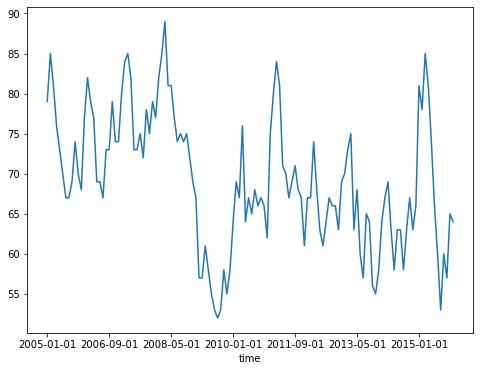

In [208]:
uni_data.plot(subplots=True)

In [209]:
uni_data = uni_data.values

масштабирование данных и стандартизация

In [210]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [211]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [338]:
univariate_past_history = 15
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

Результаты применения функции univariate_data

In [340]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target dif to predict')
print (y_train_uni[0])

Single window of past history
[[ 1.04720801]
 [ 1.79879271]
 [ 1.29773624]
 [ 0.67141566]
 [ 0.29562331]
 [-0.08016903]
 [-0.45596138]
 [-0.45596138]
 [-0.20543315]
 [ 0.42088743]
 [-0.08016903]
 [-0.33069727]
 [ 0.79667978]
 [ 1.42300036]
 [ 1.04720801]]

 Target dif to predict
0.7966797776644878


In [341]:
def create_time_steps(length):
  return list(range(-length, 0))

In [348]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], future])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\tf\\lib\\site-packages\\matplotlib\\pyplot.py'>

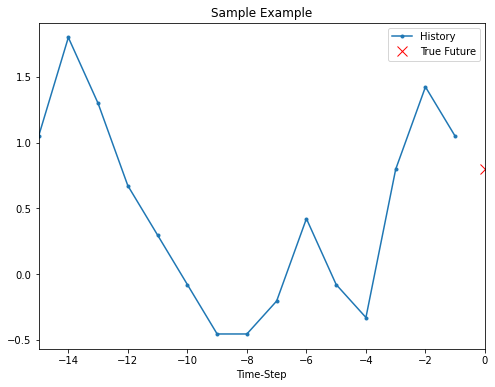

In [349]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [350]:
def baseline(history):
  return np.mean(history)

без привлечения машинного обучения

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\envs\\tf\\lib\\site-packages\\matplotlib\\pyplot.py'>

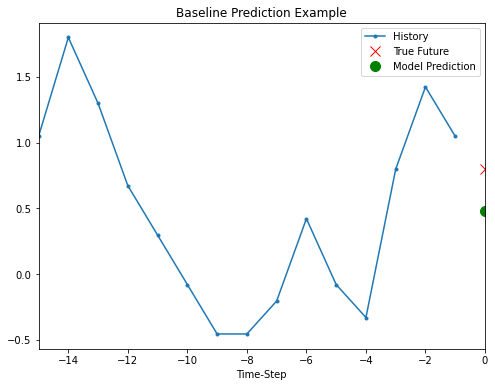

In [351]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

Рекуррентная нейронная сеть

In [354]:
BATCH_SIZE = 10
BUFFER_SIZE = 50

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [363]:
print(train_univariate,train_univariate)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 15, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))> <RepeatDataset element_spec=(TensorSpec(shape=(None, 15, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [364]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(2, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [365]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

1/1 [==============================] - 0s 333ms/step
(10, 1)


In [366]:
print(x_train_uni.shape)

(85, 15, 1)


У нас малый набора данных каждая эпоха будет проходить только 50 шагов (steps_per_epoch=50).

In [369]:
EVALUATION_INTERVAL = 50
EPOCHS = 15

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=1)

Epoch 1/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5992 - val_loss: 0.8267
Epoch 2/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5845 - val_loss: 0.8190
Epoch 3/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5915 - val_loss: 0.8076
Epoch 4/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5802 - val_loss: 0.7977
Epoch 5/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5825 - val_loss: 0.7873
Epoch 6/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5841 - val_loss: 0.7799
Epoch 7/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5691 - val_loss: 0.7757
Epoch 8/15
50/50 [==============================] - 0s 6ms/step - loss: 0.5717 - val_loss: 0.7710
Epoch 9/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5710 - val_loss: 0.7652
Epoch 10/15
50/50 [==============================] - 0s 5ms/step - loss: 0.5714 - val_loss: 0.7583
Epoch 11/15
50/50 [

Прогнозирование с использованием простой модели LSTM

1/1 [==============================] - 0s 17ms/step


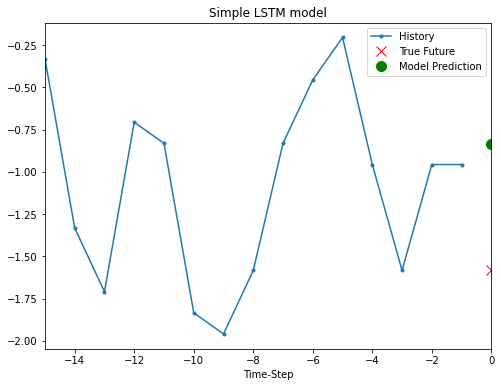

1/1 [==============================] - 0s 18ms/step


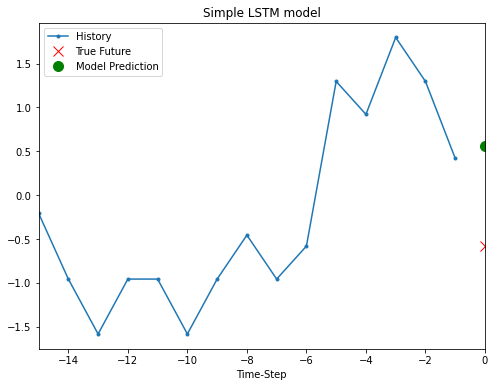

1/1 [==============================] - 0s 16ms/step


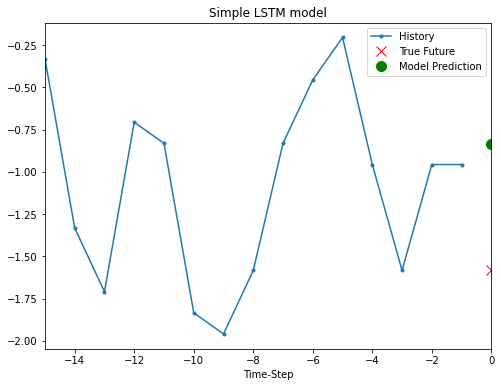

In [370]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

Прогнозирование на основе многомерного временного ряда

In [371]:
features_considered = ['Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения ', 'Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения ', 'Диффузный индекс заработной платы, ожидаемые изменения ']

In [372]:
features = df[features_considered]
features.index = df['time']
features.head()

Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения   \
time                                                                              
2005-01-01                                               79.0                     
2005-02-01                                               85.0                     
2005-03-01                                               81.0                     
2005-04-01                                               76.0                     
2005-05-01                                               73.0                     

            Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения   \
time                                                                             
2005-01-01                                               95.0                    
2005-02-01                                               95.0                    
2005-03-01                                               93.0                    
2005-04-01                                               90.0                    
2005-05-01                                               90.0                    

            Диффузный индекс заработной платы, ожидаемые изменения   
time                                                                 
2005-01-01                                               64.0        
2005-02-01                                               70.0        
2005-03-01                                               74.0        
2005-04-01                                               75.0        
2005-05-01                                               75.0

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

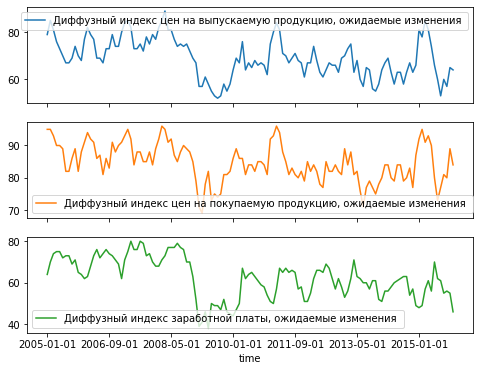

In [373]:
features.plot(subplots=True)

In [374]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [375]:
dataset = (dataset-data_mean)/data_std

In [376]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index 
# + history_size
  if end_index is None:
    end_index = len(dataset) - target_size
  print(start_index, end_index )

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])
    

    if single_step:
      labels.append(target[i+target_size])
      
    else:
      labels.append(target[i:i+target_size])
    

  return np.array(data), np.array(labels)

In [377]:
print(multivariate_data(dataset, dataset[:, 1], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True))

0 100
(array([[[ 0.92194389, -0.09656971,  0.86586838],
        [ 0.54615155,  0.43992868,  0.96283013],
        [ 1.04720801, -0.27540251,  0.57498315],
        ...,
        [-1.70860254, -0.9907337 , -0.78248128],
        [-0.70648961,  0.61876148, -0.87944303],
        [-0.83175373, -0.27540251, -1.75209874]],

       [[ 0.54615155,  0.43992868,  0.96283013],
        [ 1.04720801, -0.27540251,  0.57498315],
        [ 0.79667978,  0.61876148,  0.38105966],
        ...,
        [-0.70648961,  0.61876148, -0.87944303],
        [-0.83175373, -0.27540251, -1.75209874],
        [ 1.04720801,  1.69175827, -0.00678732]],

       [[ 1.04720801, -0.27540251,  0.57498315],
        [ 0.79667978,  0.61876148,  0.38105966],
        [ 1.42300036,  1.15525987,  0.38105966],
        ...,
        [-0.83175373, -0.27540251, -1.75209874],
        [ 1.04720801,  1.69175827, -0.00678732],
        [ 1.79879271,  1.69175827,  0.57498315]],

       ...,

       [[-1.70860254, -0.9907337 , -0.78248128],
    

In [378]:
past_history = 100
future_target = 3
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

0 100
100 129


In [379]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (100, 3)


In [380]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [381]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(8, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [382]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

1/1 [==============================] - 0s 339ms/step
(10, 1)


In [383]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=1)

Epoch 1/15
50/50 [==============================] - 3s 29ms/step - loss: 0.7156 - val_loss: 0.8477
Epoch 2/15
50/50 [==============================] - 1s 22ms/step - loss: 0.6886 - val_loss: 0.8364
Epoch 3/15
50/50 [==============================] - 1s 22ms/step - loss: 0.6608 - val_loss: 0.8796
Epoch 4/15
50/50 [==============================] - 1s 21ms/step - loss: 0.6289 - val_loss: 0.9522
Epoch 5/15
50/50 [==============================] - 1s 19ms/step - loss: 0.6073 - val_loss: 1.0124
Epoch 6/15
50/50 [==============================] - 1s 21ms/step - loss: 0.5889 - val_loss: 1.0807
Epoch 7/15
50/50 [==============================] - 1s 19ms/step - loss: 0.5726 - val_loss: 1.1550
Epoch 8/15
50/50 [==============================] - 1s 20ms/step - loss: 0.5590 - val_loss: 1.2110
Epoch 9/15
50/50 [==============================] - 1s 21ms/step - loss: 0.5447 - val_loss: 1.2901
Epoch 10/15
50/50 [==============================] - 1s 23ms/step - loss: 0.5294 - val_loss: 1.2884
Epoch 11/

In [384]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

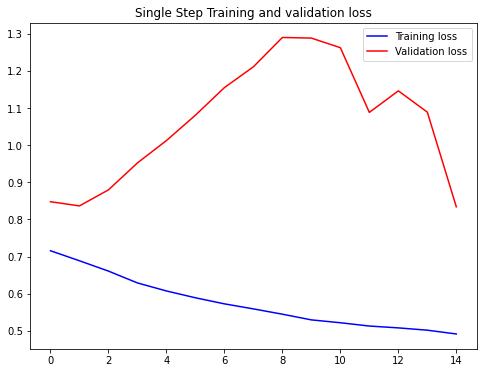

In [385]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

1/1 [==============================] - 0s 23ms/step


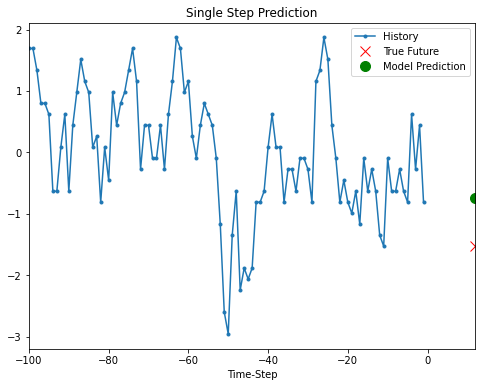

1/1 [==============================] - 0s 21ms/step


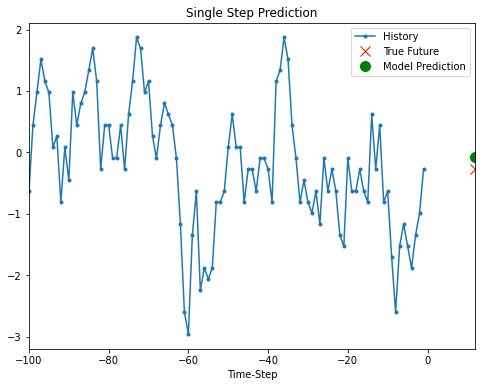

1/1 [==============================] - 0s 22ms/step


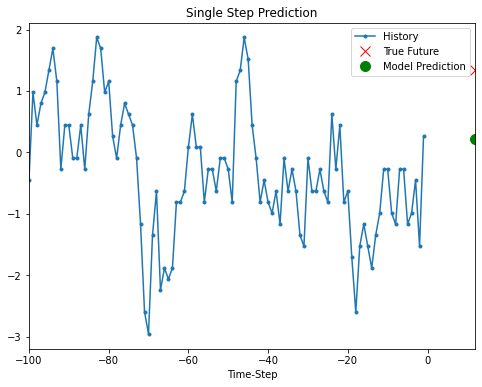

In [386]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

In [387]:
future_target = 8
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

0 100
100 124


In [388]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target dif to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (100, 3)

 Target dif to predict : (8,)


In [389]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [390]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

Истинное будущее значение

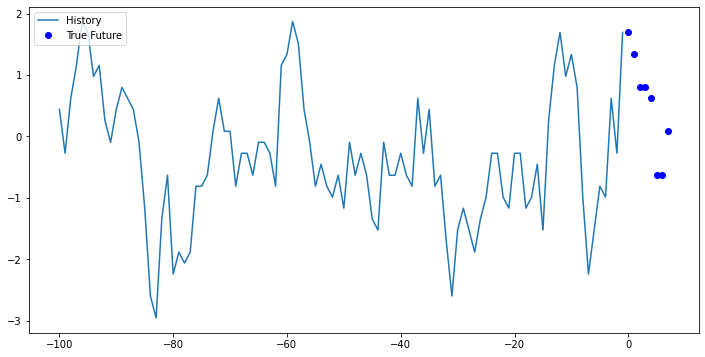

In [391]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

In [392]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(8,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(2, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(8))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [393]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

1/1 [==============================] - 0s 455ms/step
(10, 8)


In [394]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=1)

Epoch 1/15
50/50 [==============================] - 5s 48ms/step - loss: 0.8069 - val_loss: 1.0588
Epoch 2/15
50/50 [==============================] - 2s 39ms/step - loss: 0.8033 - val_loss: 1.0441
Epoch 3/15
50/50 [==============================] - 2s 40ms/step - loss: 0.7963 - val_loss: 1.0311
Epoch 4/15
50/50 [==============================] - 2s 40ms/step - loss: 0.7867 - val_loss: 1.0139
Epoch 5/15
50/50 [==============================] - 2s 40ms/step - loss: 0.7743 - val_loss: 0.9966
Epoch 6/15
50/50 [==============================] - 2s 41ms/step - loss: 0.7578 - val_loss: 0.9714
Epoch 7/15
50/50 [==============================] - 2s 44ms/step - loss: 0.7439 - val_loss: 0.9582
Epoch 8/15
50/50 [==============================] - 2s 47ms/step - loss: 0.7321 - val_loss: 0.9389
Epoch 9/15
50/50 [==============================] - 2s 43ms/step - loss: 0.7206 - val_loss: 0.9237
Epoch 10/15
50/50 [==============================] - 2s 43ms/step - loss: 0.7108 - val_loss: 0.9183
Epoch 11/

Потери на этапах обучения и проверки модели

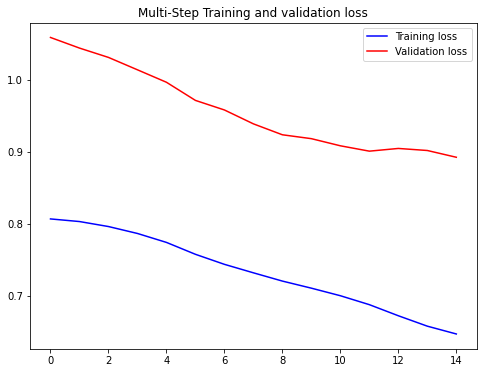

In [395]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

1/1 [==============================] - 0s 28ms/step


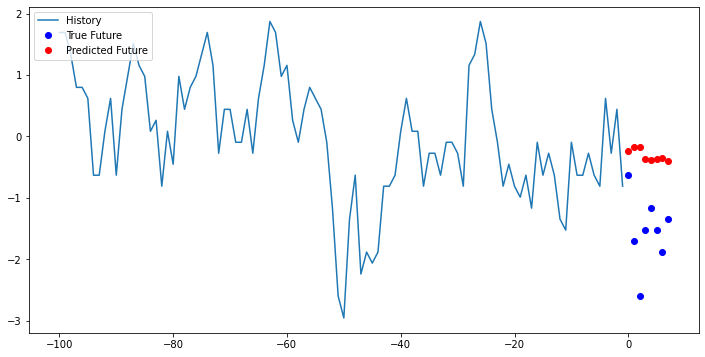

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 23ms/step


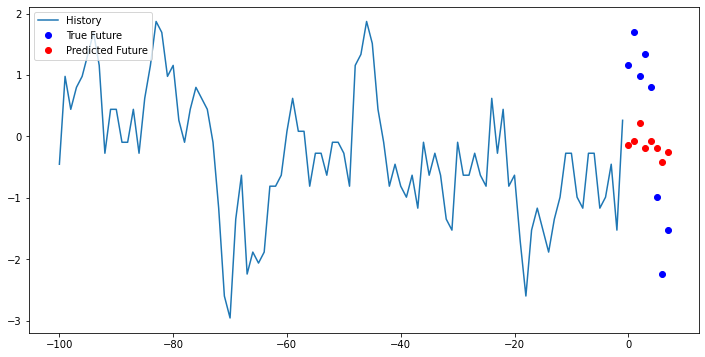

In [396]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])